In [ ]:
# importing library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# loading the MNIST data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


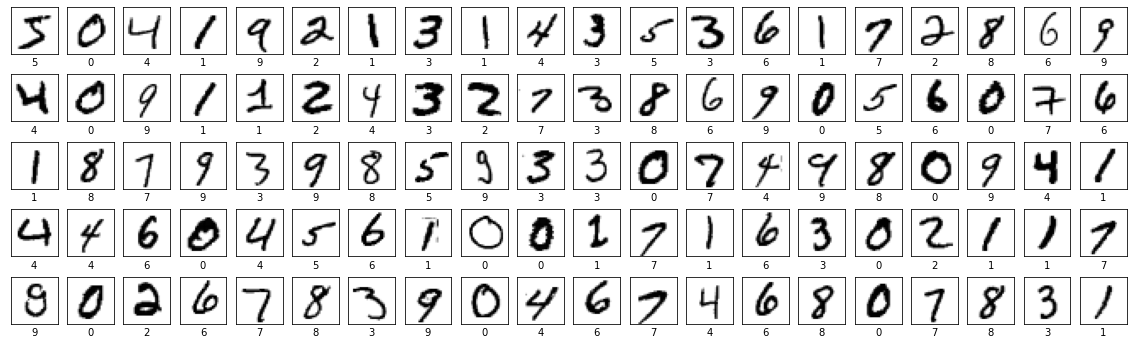

In [ ]:
# showiing the data
plt.figure(figsize = (20, 6))
for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(Y_train[i])
plt.show()

In [ ]:
# preprocessing data
X_train, X_test = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255, X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [ ]:
# creating model (sequential)
model = tf.keras.Sequential([
	tf.keras.Input(shape=(28, 28, 1)),
	tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
	tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(
	optimizer = tf.keras.optimizers.Adam(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

In [ ]:
# training the model
h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 27s 20ms/step - loss: 0.1850 - accuracy: 0.9435 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 2/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0602 - val_accuracy: 0.9817
Epoch 3/20
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0527 - val_accuracy: 0.9843
Epoch 4/20
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0517 - val_accuracy: 0.9851
Epoch 5/20
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0595 - val_accuracy: 0.9816
Epoch 6/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0516 - val_accuracy: 0.9859
Epoch 7/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0490 -

In [ ]:
#test accuracy
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0491 - accuracy: 0.9900

Test accuracy: 0.9900000095367432


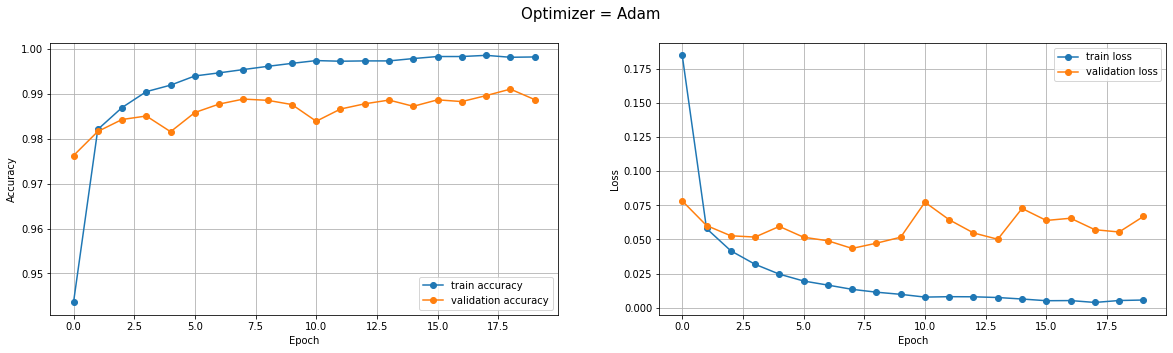

In [ ]:
# Plotting the training results
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = Adam', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
# compiling the model
model.compile(
	optimizer = tf.keras.optimizers.SGD(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0614 - val_accuracy: 0.9897
Epoch 2/20
1313/1313 [==============================] - 31s 24ms/step - loss: 9.4029e-04 - accuracy: 0.9997 - val_loss: 0.0619 - val_accuracy: 0.9901
Epoch 3/20
1313/1313 [==============================] - 32s 24ms/step - loss: 6.3440e-04 - accuracy: 0.9998 - val_loss: 0.0609 - val_accuracy: 0.9901
Epoch 4/20
1313/1313 [==============================] - 31s 24ms/step - loss: 4.6721e-04 - accuracy: 0.9999 - val_loss: 0.0614 - val_accuracy: 0.9899
Epoch 5/20
1313/1313 [==============================] - 31s 24ms/step - loss: 3.7002e-04 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9898
Epoch 6/20
1313/1313 [==============================] - 31s 24ms/step - loss: 3.1124e-04 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 0.9900
Epoch 7/20
1313/1313 [==============================] - 31s 24ms/step - loss: 2.6909e-04 - accuracy: 1.0

In [ ]:
# training the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 8ms/step - loss: 0.0438 - accuracy: 0.9923

Test accuracy: 0.9922999739646912


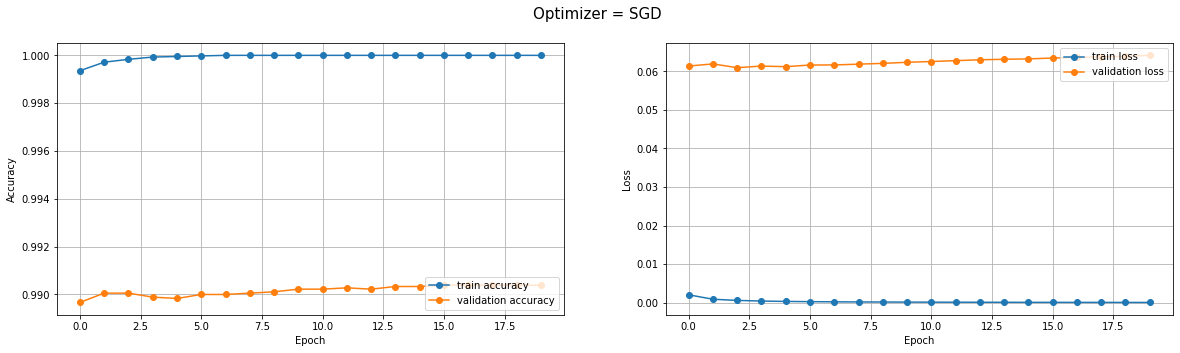

In [ ]:
# Plotting the training results
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = SGD', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
# compiling the model
model.compile(
	optimizer = tf.keras.optimizers.RMSprop(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 34s 25ms/step - loss: 5.4630e-04 - accuracy: 0.9997 - val_loss: 0.0831 - val_accuracy: 0.9904
Epoch 2/20
1313/1313 [==============================] - 33s 25ms/step - loss: 4.4517e-04 - accuracy: 0.9999 - val_loss: 0.1016 - val_accuracy: 0.9902
Epoch 3/20
1313/1313 [==============================] - 33s 25ms/step - loss: 2.0355e-04 - accuracy: 0.9999 - val_loss: 0.1060 - val_accuracy: 0.9908
Epoch 4/20
1313/1313 [==============================] - 33s 25ms/step - loss: 1.4816e-04 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9900
Epoch 5/20
1313/1313 [==============================] - 33s 25ms/step - loss: 2.8867e-04 - accuracy: 0.9999 - val_loss: 0.1161 - val_accuracy: 0.9906
Epoch 6/20
1313/1313 [==============================] - 33s 25ms/step - loss: 6.4245e-05 - accuracy: 1.0000 - val_loss: 0.1290 - val_accuracy: 0.9897
Epoch 7/20
1313/1313 [==============================] - 33s 25ms/step - loss: 1.7403e-04 - accuracy:

In [ ]:
# training the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.1004 - accuracy: 0.9922

Test accuracy: 0.9922000169754028


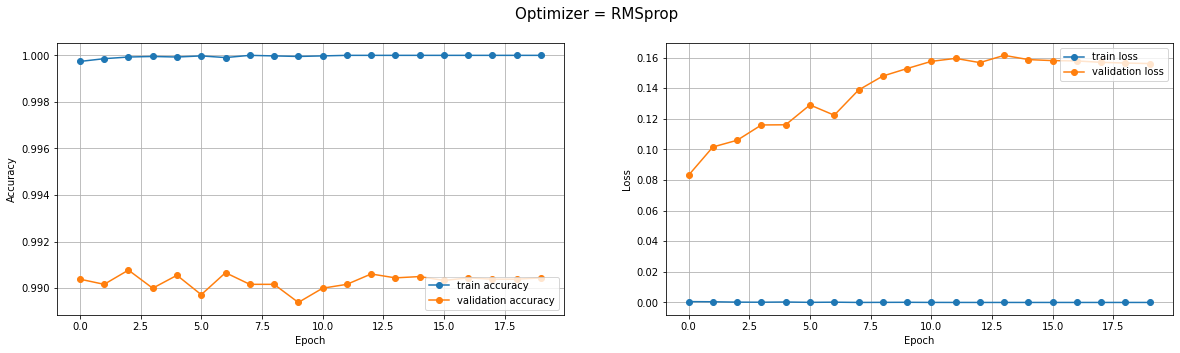

In [ ]:
# Plotting the training results
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = RMSprop', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()